In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Relevant Libraries

In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import joblib
from joblib import dump
import pickle
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score
import seaborn as sns

# Loading the data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car data.csv')

In [4]:
data = pd.DataFrame(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Exploratory Data Analysis

In [6]:
object_cols = data.select_dtypes('O').columns

object_df = pd.DataFrame({
    'Objects': object_cols,
    'Unique values': [data[col].unique() for col in object_cols],
    'number of unique values':[data[col].nunique()for col in object_cols]
})

object_df

,Objects,Unique values,number of unique values
0,Car_Name,"[ritz, sx4, ciaz, wagon r, swift, vitara brezz...",98
1,Fuel_Type,"[Petrol, Diesel, CNG]",3
2,Selling_type,"[Dealer, Individual]",2
3,Transmission,"[Manual, Automatic]",2


In [7]:
categorical = data.select_dtypes(include=['object']).columns
categorical

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

In [8]:
numerical = data.select_dtypes(include=['int', 'float']).columns
numerical

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')

In [9]:
data[numerical].describe(include='all')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


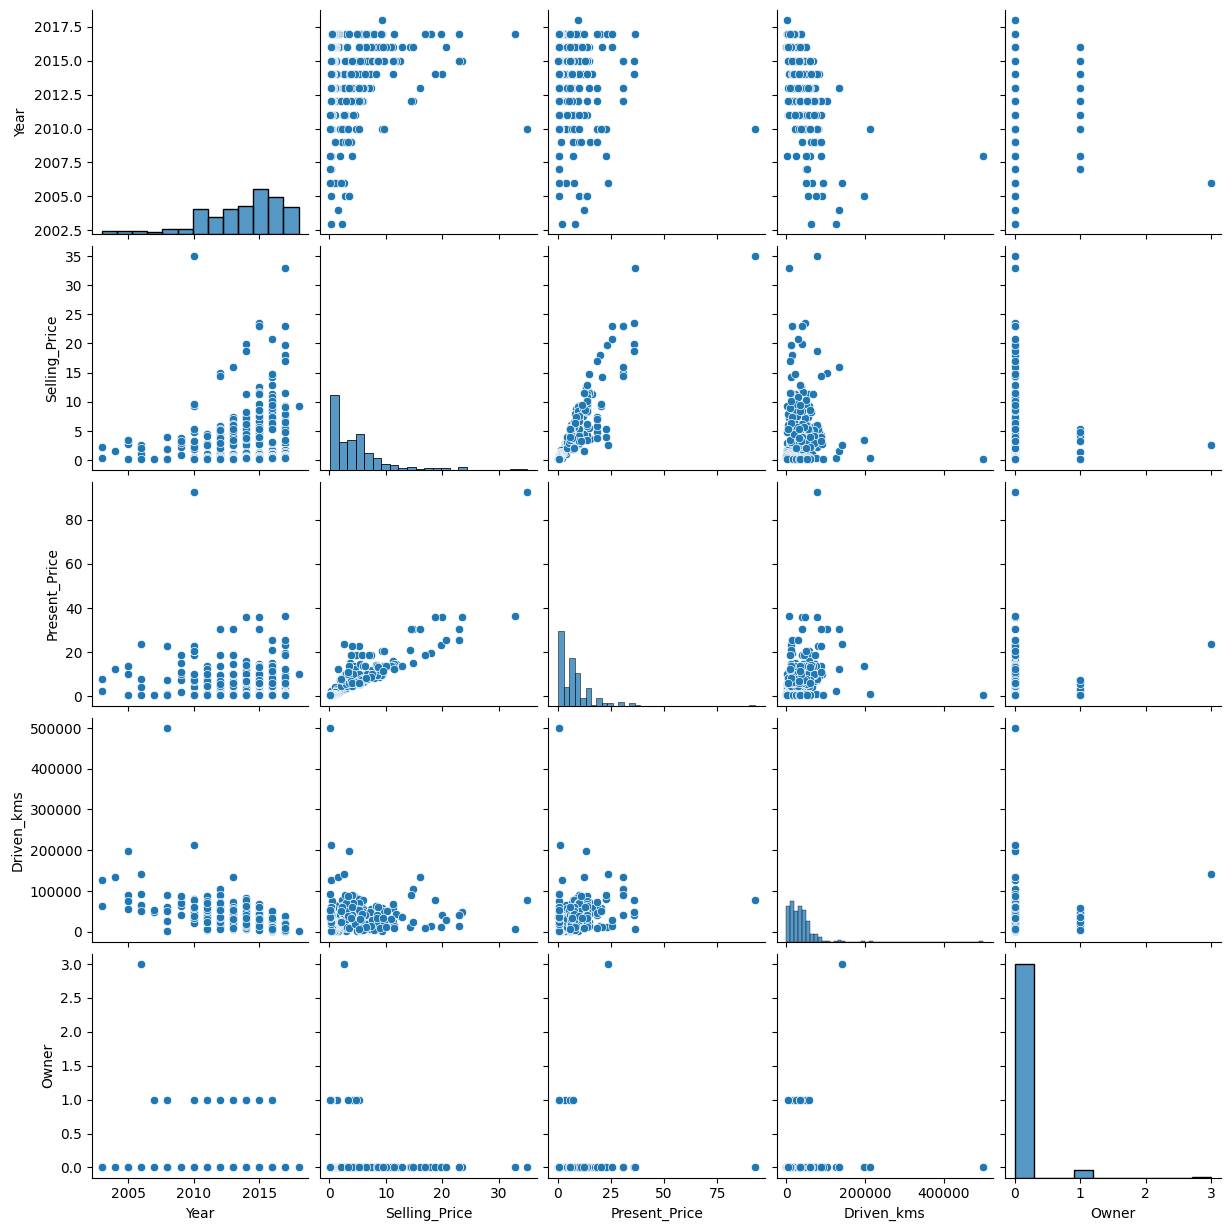

In [10]:
sns.pairplot(data)
plt.show()

#Encoding the Data

In [11]:
categorical_columns = data[categorical]
label_encoder = LabelEncoder()

In [12]:
label_encoded = categorical_columns.apply(lambda x: label_encoder.fit_transform(x))
categorical_values = pd.DataFrame(label_encoded)

In [13]:
data = data.drop(columns =categorical)

In [14]:
data = pd.concat([data, categorical_values], axis=1)

In [15]:
data

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,0,90,2,0,1
1,2013,4.75,9.54,43000,0,93,1,0,1
2,2017,7.25,9.85,6900,0,68,2,0,1
3,2011,2.85,4.15,5200,0,96,2,0,1
4,2014,4.60,6.87,42450,0,92,1,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,69,1,0,1
297,2015,4.00,5.90,60000,0,66,2,0,1
298,2009,3.35,11.00,87934,0,69,2,0,1
299,2017,11.50,12.50,9000,0,69,1,0,1


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

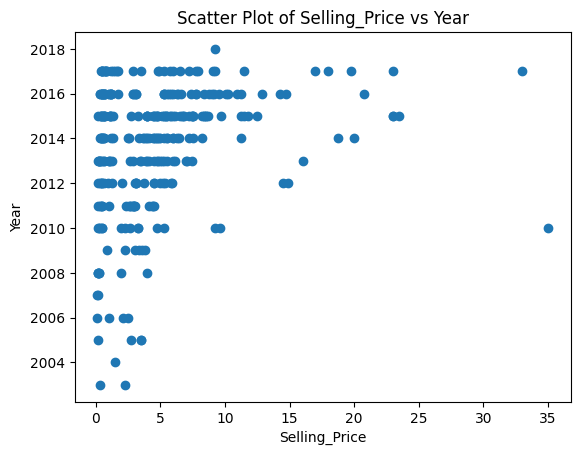

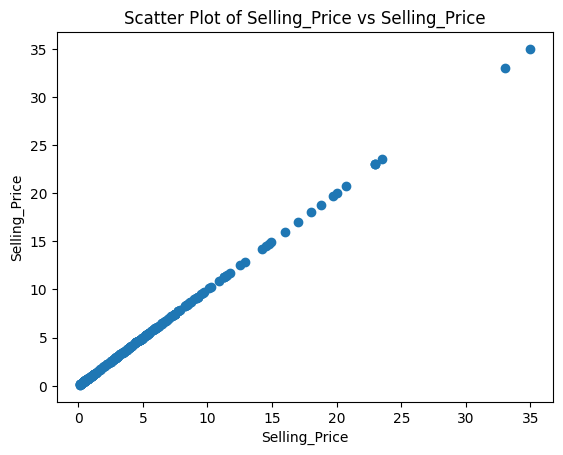

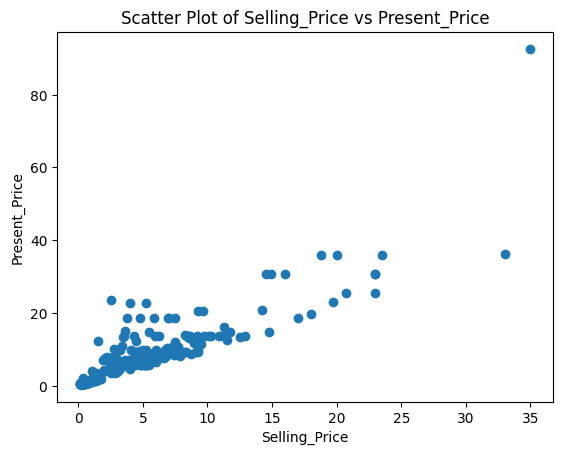

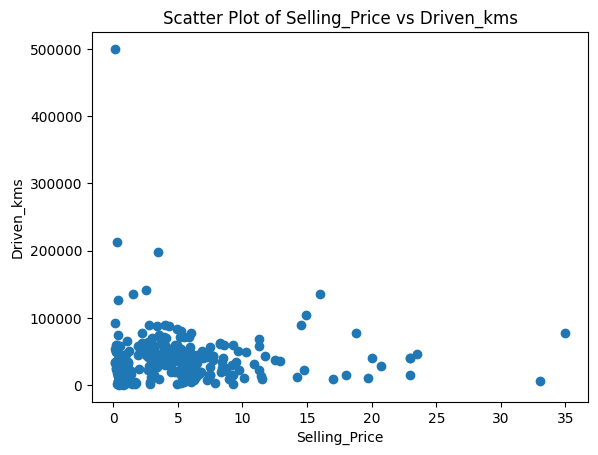

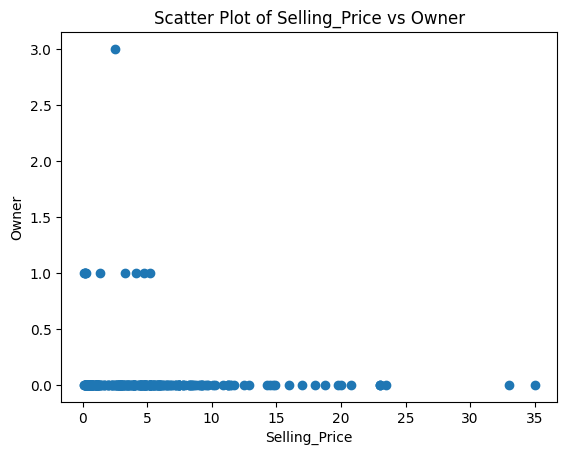

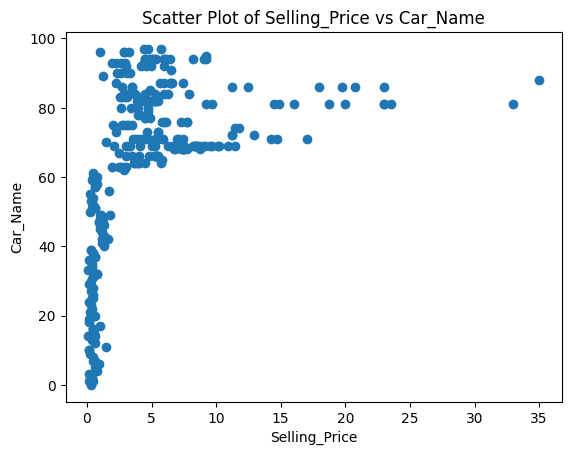

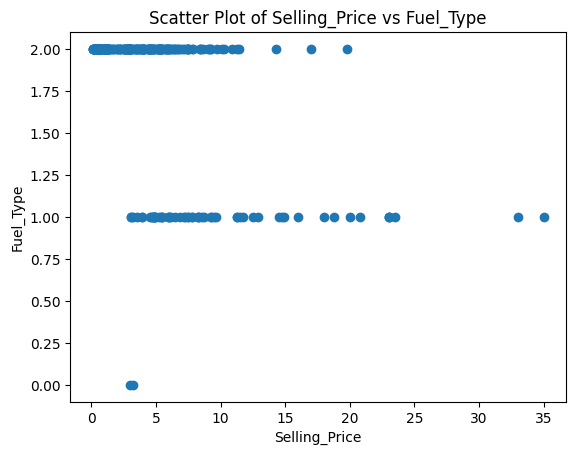

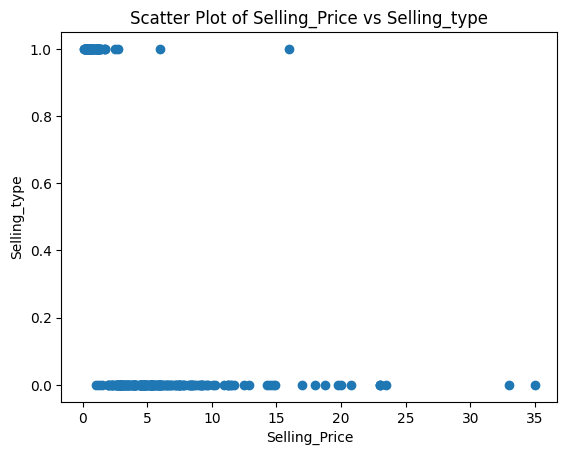

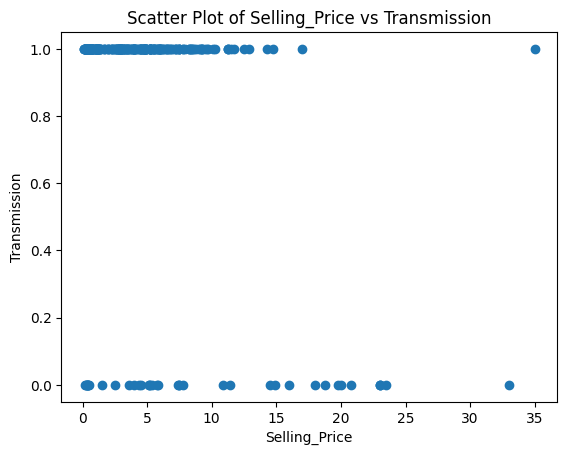

In [18]:
for i in data:
  plt.scatter(data['Selling_Price'], data[i])
  plt.xlabel('Selling_Price')
  plt.ylabel(i)
  plt.title(f'Scatter Plot of Selling_Price vs {i}')
  plt.show()

In [19]:
Y = data['Selling_Price']
X = data.drop('Selling_Price', axis =1)

In [20]:
scaled = scaler.fit_transform(X)
data = pd.DataFrame(scaled, columns=X.columns)
X = data

In [21]:
pickle.dump(scaler, open("scaler.pkl", 'wb'))

In [22]:
X

,Year,Present_Price,Driven_kms,Owner,Car_Name,Fuel_Type,Selling_type,Transmission
0,0.128897,-0.236256,-0.256224,-0.174501,1.074323,0.500183,-0.737285,0.39148
1,-0.217514,0.221544,0.155911,-0.174501,1.191828,-1.852241,-0.737285,0.39148
2,1.168129,0.257472,-0.773969,-0.174501,0.212627,0.500183,-0.737285,0.39148
3,-0.910335,-0.403151,-0.817758,-0.174501,1.309332,0.500183,-0.737285,0.39148
4,0.128897,-0.087906,0.141743,-0.174501,1.152659,-1.852241,-0.737285,0.39148
...,...,...,...,...,...,...,...,...
296,0.821718,0.460295,-0.076225,-0.174501,0.251795,-1.852241,-0.737285,0.39148
297,0.475308,-0.200328,0.593804,-0.174501,0.134290,0.500183,-0.737285,0.39148
298,-1.603156,0.390756,1.313340,-0.174501,0.251795,0.500183,-0.737285,0.39148
299,1.168129,0.564604,-0.719876,-0.174501,0.251795,-1.852241,-0.737285,0.39148


# Training and Test a model using the Random Forest Regressor

In [23]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
rf=RandomForestRegressor()

In [25]:
rf= RandomForestRegressor(n_estimators=100, random_state=42)

In [26]:
rf.fit(Xtrain, Ytrain)

RandomForestRegressor(random_state=42)

In [27]:
rf_pred = rf.predict(Xtest)

In [28]:
r2 = r2_score(rf_pred, Ytest)
print(f"R-squared: {r2}")

R-squared: 0.9619455007805559


In [29]:
pickle.dump(rf, open("rf_model.pkl", "wb"))